In [2]:
# import our modules
import sqlite3
import pandas as pd

In [4]:
# connect to the database
con = sqlite3.connect('/home/paulhancock/Downloads/portal_mammals.sqlite')

In [7]:
surveys_df = pd.read_sql("SELECT * FROM surveys", con)

In [8]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,None,NaN,NaN
35545,35546,12,31,2002,15,AH,None,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [9]:
surveys_df['sex'].unique()

array(['M', 'F', None], dtype=object)

In [12]:
#pd.unique(surveys_df['species_id'])
# OR
surveys_df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', None, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [13]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [14]:
by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
site_sex_count.unstack()

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


plot_id  sex
1        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
2        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
3        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
4        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
5        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
6        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
7        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
8        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
9        F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
10       F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
11       F      Axes(0.125,0.11;0.775x0.77)
         M      Axes(0.125,0.11;0.775x0.77)
12       F      Axe

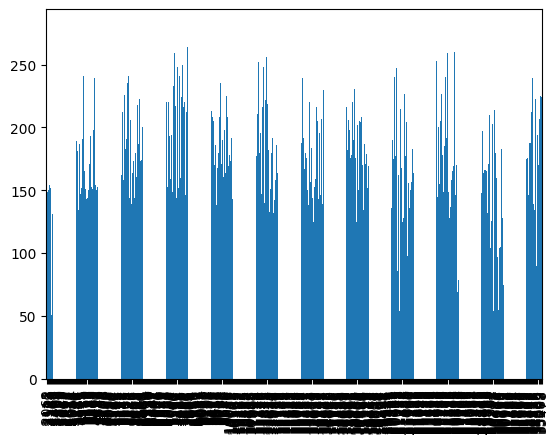

In [18]:
%matplotlib inline
by_site_sex['weight'].plot(kind='bar')

Text(0.5, 0, 'Plot')

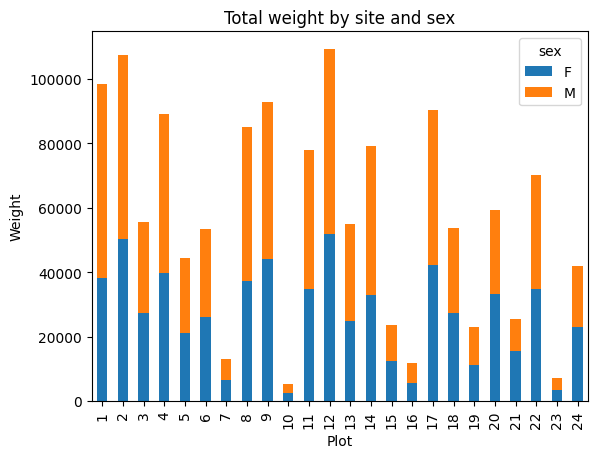

In [19]:
by_site_sex = surveys_df.groupby(['plot_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
spc = site_sex_count.unstack()
s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")

<Axes: xlabel='sex'>

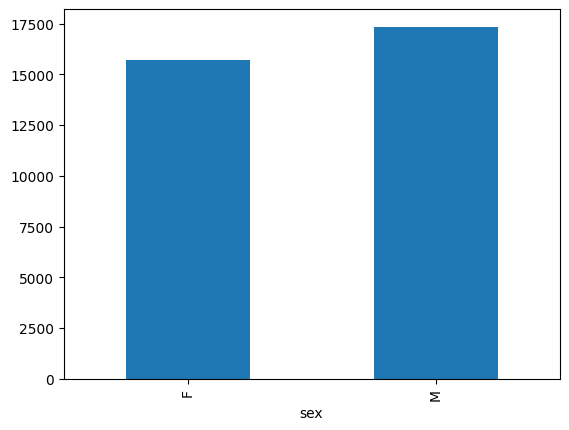

In [20]:
surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')

<Axes: xlabel='plot_id'>

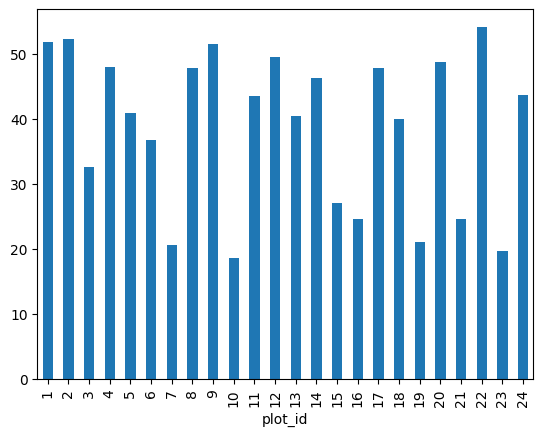

In [22]:
surveys_df.groupby('plot_id')["weight"].mean().plot(kind='bar')

<Axes: xlabel='species_id'>

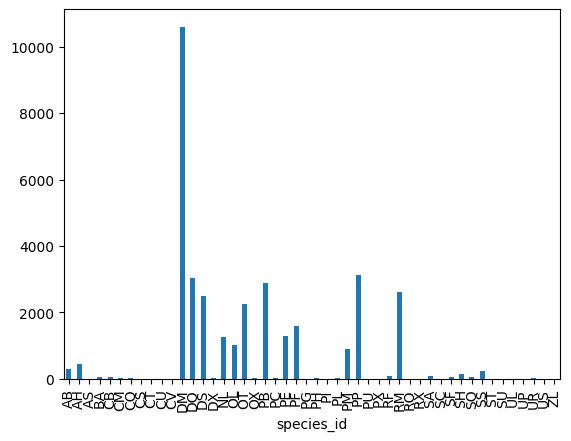

In [24]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()
species_counts.plot(kind='bar')